For that lab we will need keras, so go to your python.exe location and run:

`python -m pip install keras`

That will install keras and tensorflow libraries for you.

For model visualization we will also need [graphviz](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) lib, so also please navigate to the link and install it, also adding it ti PATH variable.

We will work firstly with pretrained model:

In [1]:
import pydot
import numpy as np 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
model = keras.applications.vgg16.VGG16()

### Getting weight and layers data 

Let us visualize this model

And also see the shapes of weights

In [3]:
weights = model.get_weights()
for weight in weights:
    print(weight.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


In [4]:
layers = model.layers
for layer in layers:
    print(layer)

In [5]:
len(layers), len(weights)

(23, 32)

### Task 1 
Visualize weights from the input layer

In [68]:
l1 = model.get_weights()[0]
l1 = l1.reshape(64,3,3,3)
print(l1[0].shape)

(3, 3, 3)


In [1]:
# Tried to reshape using transpose, but by some reason "shape" differs from reshap
l1 = model.get_weights()[0]
print(l1.shape)
l1 = l1.transpose([3,0,1,2])
print(l1[0].shape)

NameError: name 'model' is not defined

<Figure size 432x288 with 0 Axes>

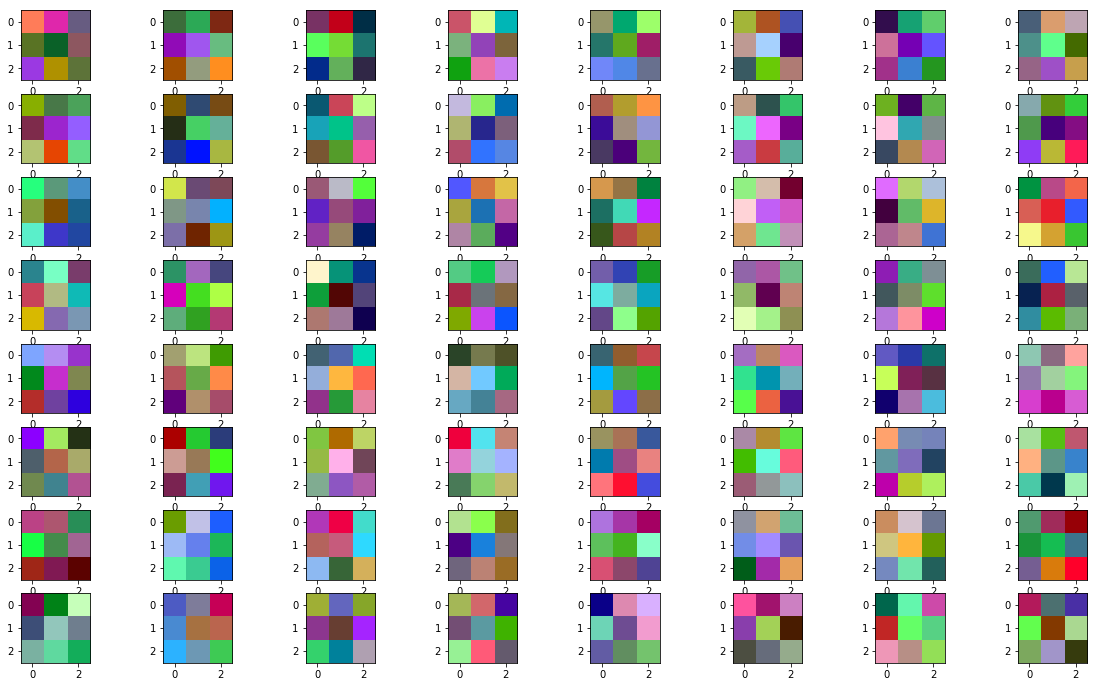

In [69]:
# your code to get filter from weights and than transform to the shape, that is compatible with cv2
# please notice the shape of the layer 
img = l1[0].copy()

# Normalization for visualization
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
fig = plt.figure()
# 8x8 - 64 filters
row_size = 8
col_size = 8
fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
filter_id=0
for row in range(0,row_size):
    for col in range(0,col_size):
        cv2.normalize(l1[filter_id].copy(),  l1[filter_id], 0, 255, cv2.NORM_MINMAX)
        ax[row][col].imshow(l1[filter_id].astype('uint8'))
        filter_id += 1

### Task 2

Feed an image to the model and get an output image from some layer

You can see the output from each layer using this [guide](https://stackoverflow.com/a/41712013)

In [71]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
# load an image from file
img = load_img('openCV-data/lena.png', target_size=(224, 224, 3))
# convert the image pixels to a numpy array, cause load_img loads it for Keras formats, not numpy/openCV
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# prepare the image for the VGG model
img = preprocess_input(img)

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
y = model.predict(img)

In [74]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    print (activation.shape)
    filter_id=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, filter_id], cmap='gray')
            filter_id += 1

(1, 224, 224, 64)


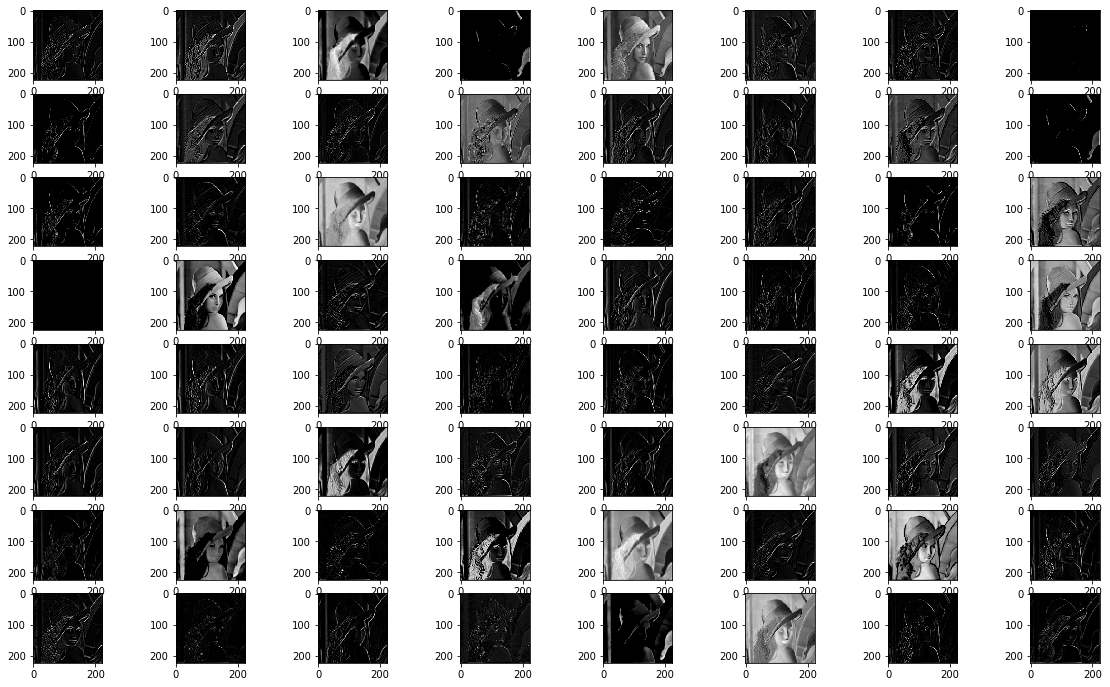

In [75]:
display_activation(activations, 8, 8, 1)

### Task 3 

Classify cats and dogs images with [features from CNN](https://keras.io/applications/#extract-features-with-vgg16) using SVM/KNN/etc...

### Building your own model

Consider the NON-working example below (x_train not defined)

In [6]:
import os
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
model = VGG16(weights='imagenet', include_top=False)

In [8]:
# Commercial images used for example are removed from repo
folder = 'openCV-data/train/'
labels = []
CNN_features = []
for ind, image_path,  in enumerate(os.listdir(folder)):
    print (image_path)
    if image_path.find('deal')!=-1:
        labels.append(1)
    else:
        labels.append(0)
    img = image.load_img(folder+'/'+image_path, target_size=(224, 224,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    CNN_features.append(model.predict(x)[0].flatten())

deal (1).png
deal (2).png
deal (3).png
deal (4).png
deal (5).png
deal (6).png
deal (7).png
nod (1).png
nod (10).png
nod (11).png
nod (2).png
nod (3).png
nod (4).png
nod (5).png
nod (6).png
nod (7).png
nod (8).png
nod (9).png


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [11]:
CNN_features[0].shape

(25088,)

In [12]:
KNN.fit(CNN_features[::2], list_of_labels[::2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [13]:
KNN.predict(CNN_features[1::2])

array([1, 0, 1, 1, 0, 0, 0, 0, 0])

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(KNN.predict(CNN_features[1::2]), labels[1::2])

0.75

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras import backend as K

import keras

Using TensorFlow backend.


In [4]:
img_rows, img_cols = 28, 28
batch_size = 2560
num_classes = 10
epochs = 25

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Компилируем модель
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

# Обучение модели
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

KeyboardInterrupt: 

### Resulting Accuracy - >97%
### On 25 epochs - >99%
#### Difference between validation and train accuracy - <2%

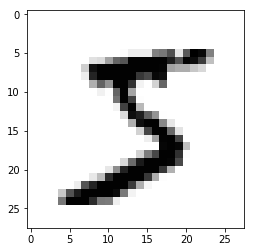

In [65]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = x_train[0]

cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')

#cv2.imshow(img)
#ax1 = figimg.add_subplot(1,1,1)
#ax1.imshow(img)#.astype('uint8'))

In [67]:
img = X_train[0]
model.predict(255 - img.reshape((1, 28,28,1))).argmax()

5

### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train our model on augmented data and compare the results on your images from the web.

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_train_inverted = 1 - x_train

In [10]:
x_train_all = np.concatenate((x_train, x_train_inverted), axis=0)
y_train_all = np.concatenate((y_train, y_train), axis=0).astype('uint8')

In [11]:
y_train_all.shape, y_train_all.shape

((120000, 10), (120000, 10))

3


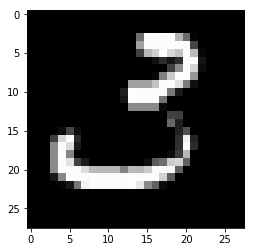

In [13]:
import cv2
import matplotlib.pyplot as plt
img = x_train_all[-20]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(y_train_all[-20].argmax())

In [27]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)

In [28]:
datagen.fit(x_train_all)

[0 0 0 0 0 0 0 0 1 0]


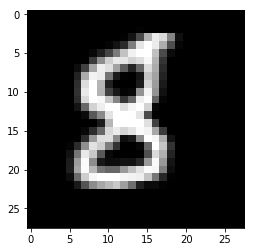

In [29]:
for x,y in datagen.flow(x_train_all, y_train_all):
    plt.imshow(x[0].reshape((28,28)), cmap='gray')
    print(y[0])
    break

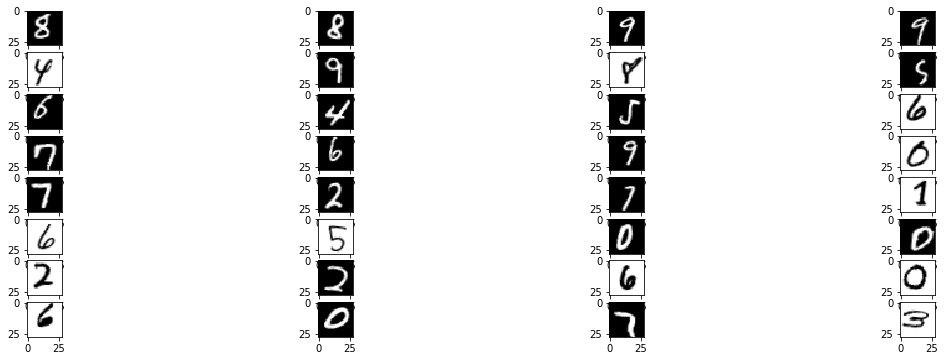

In [30]:
activation_index = 0
fig, ax = plt.subplots(8, 4, figsize=(8*2.5,4*1.5))
for row in range(0,8):
    for col in range(0,4):
        ax[row][col].imshow(x[activation_index].reshape((28,28)), cmap='gray')
        #print(y[activation_index].argmax())
        activation_index += 1

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit_generator(datagen.flow(x_train_all, y_train_all, batch_size=320),
                    steps_per_epoch=60000//320, epochs=10)

Epoch 1/10
187/187 [==============================] - 22s 119ms/step - loss: 0.4466 - acc: 0.8618
Epoch 2/10
187/187 [==============================] - 23s 124ms/step - loss: 0.2429 - acc: 0.9262
Epoch 3/10
187/187 [==============================] - 23s 120ms/step - loss: 0.2020 - acc: 0.9389
Epoch 4/10
187/187 [==============================] - 22s 119ms/step - loss: 0.1798 - acc: 0.9452
Epoch 5/10
187/187 [==============================] - 24s 128ms/step - loss: 0.1680 - acc: 0.9497
Epoch 6/10
187/187 [==============================] - 23s 122ms/step - loss: 0.1561 - acc: 0.9541
Epoch 7/10
187/187 [==============================] - 22s 118ms/step - loss: 0.1461 - acc: 0.9572
Epoch 8/10
187/187 [==============================] - 22s 118ms/step - loss: 0.1380 - acc: 0.9587
Epoch 9/10
187/187 [==============================] - 22s 118ms/step - loss: 0.1323 - acc: 0.9599
Epoch 10/10
187/187 [==============================] - 23s 122ms/step - loss: 0.1304 - acc: 0.9614


### Model quality is comparable to original one, but training speed is much worse.
* "Overfitting" is less, but it's hard to see on such a good accuracy
* Also, inverted colours are now supported, but in prod mostly it's easier to invert colours before inference process

5


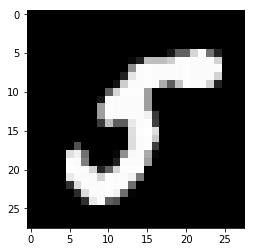

In [15]:
sample_number = -150
img = x_train_all[sample_number]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(y_train_all[sample_number].argmax())

In [16]:
img = x_train_all[sample_number]
model.predict(255 - img.reshape((1, 28,28,1))).argmax()
# Redefined model with previous, so doesn't supports inverted colours

4

### Task 6
Use pretrained model to train on CIFAR-10 dataset. For that, you can try to use your CNN architecture.

In [37]:
from keras.datasets import cifar10

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32

# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


170500096/170498071 [==============================] - 47s 0us/step


In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model
model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

In [41]:
for layer in model.layers:
    print(layer)
    layer.trainable = False

In [42]:
add_model = Sequential()
add_model.add(Flatten(input_shape=model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model_cl = Model(inputs=model.input, outputs=add_model(model.output))

In [43]:
for layer in model_cl.layers[:-1]:
    print(layer.trainable)
    #layer.trainable = False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [44]:
model_cl.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

print(model_cl.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [ ]:
model_cl.fit(X_train, Y_train, batch_size=1280, epochs=8)

Epoch 1/8
50000/50000 [==============================] - 21s 426us/step - loss: 1.4497 - acc: 0.5019
Epoch 2/8
50000/50000 [==============================] - 18s 351us/step - loss: 1.3770 - acc: 0.5276
Epoch 3/8
50000/50000 [==============================] - 18s 365us/step - loss: 1.3298 - acc: 0.5446
Epoch 4/8
50000/50000 [==============================] - 18s 366us/step - loss: 1.2919 - acc: 0.5575
Epoch 5/8
50000/50000 [==============================] - 18s 361us/step - loss: 1.2575 - acc: 0.5689
Epoch 6/8
50000/50000 [==============================] - 18s 352us/step - loss: 1.2327 - acc: 0.5751
Epoch 7/8
50000/50000 [==============================] - 18s 353us/step - loss: 1.2072 - acc: 0.5836
Epoch 8/8
15360/50000 [========>.....................] - ETA: 12s - loss: 1.1912 - acc: 0.5873

In [240]:
model_cl.evaluate(X_test, Y_test)

10000/10000 [==============================] - 57s 6ms/step


[1.1065845924377442, 0.6159]

### Result is bad, cause, in my opinion, features of relatively high res images of ImageNet are not very good for low res CIFAR

# Task 7
Implement style transfer technique

In [17]:
from __future__ import print_function
from keras.preprocessing.image import load_img, save_img, img_to_array
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
import time
import argparse

from keras.applications import vgg19
from keras import backend as K

parser = argparse.ArgumentParser(description='Neural style transfer with Keras.')
parser.add_argument('base_image_path', metavar='base', type=str,
                    help='Path to the image to transform.')
parser.add_argument('style_reference_image_path', metavar='ref', type=str,
                    help='Path to the style reference image.')
parser.add_argument('result_prefix', metavar='res_prefix', type=str,
                    help='Prefix for the saved results.')
parser.add_argument('--iter', type=int, default=10, required=False,
                    help='Number of iterations to run.')
parser.add_argument('--content_weight', type=float, default=0.025, required=False,
                    help='Content weight.')
parser.add_argument('--style_weight', type=float, default=1.0, required=False,
                    help='Style weight.')
parser.add_argument('--tv_weight', type=float, default=1.0, required=False,
                    help='Total Variation weight.')

args = parser.parse_args()
base_image_path = args.base_image_path
style_reference_image_path = args.style_reference_image_path
result_prefix = args.result_prefix
iterations = args.iter

# these are the weights of the different loss components
total_variation_weight = args.tv_weight
style_weight = args.style_weight
content_weight = args.content_weight

# dimensions of the generated picture.
width, height = load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

# util function to open, resize and format pictures into appropriate tensors


def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_nrows, img_ncols))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

# util function to convert a tensor into a valid image


def deprocess_image(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, img_nrows, img_ncols))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((img_nrows, img_ncols, 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# get tensor representations of our images
base_image = K.variable(preprocess_image(base_image_path))
style_reference_image = K.variable(preprocess_image(style_reference_image_path))

# this will contain our generated image
if K.image_data_format() == 'channels_first':
    combination_image = K.placeholder((1, 3, img_nrows, img_ncols))
else:
    combination_image = K.placeholder((1, img_nrows, img_ncols, 3))

# combine the 3 images into a single Keras tensor
input_tensor = K.concatenate([base_image,
                              style_reference_image,
                              combination_image], axis=0)

# build the VGG19 network with our 3 images as input
# the model will be loaded with pre-trained ImageNet weights
model = vgg19.VGG19(input_tensor=input_tensor,
                    weights='imagenet', include_top=False)
print('Model loaded.')

# get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])

# compute the neural style loss
# first we need to define 4 util functions

# the gram matrix of an image tensor (feature-wise outer product)


def gram_matrix(x):
    assert K.ndim(x) == 3
    if K.image_data_format() == 'channels_first':
        features = K.batch_flatten(x)
    else:
        features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram

# the "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


def style_loss(style, combination):
    assert K.ndim(style) == 3
    assert K.ndim(combination) == 3
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_nrows * img_ncols
    return K.sum(K.square(S - C)) / (4.0 * (channels ** 2) * (size ** 2))

# an auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image


def content_loss(base, combination):
    return K.sum(K.square(combination - base))

# the 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


def total_variation_loss(x):
    assert K.ndim(x) == 4
    if K.image_data_format() == 'channels_first':
        a = K.square(
            x[:, :, :img_nrows - 1, :img_ncols - 1] - x[:, :, 1:, :img_ncols - 1])
        b = K.square(
            x[:, :, :img_nrows - 1, :img_ncols - 1] - x[:, :, :img_nrows - 1, 1:])
    else:
        a = K.square(
            x[:, :img_nrows - 1, :img_ncols - 1, :] - x[:, 1:, :img_ncols - 1, :])
        b = K.square(
            x[:, :img_nrows - 1, :img_ncols - 1, :] - x[:, :img_nrows - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

# combine these loss functions into a single scalar
loss = K.variable(0.0)
layer_features = outputs_dict['block5_conv2']
base_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss += content_weight * content_loss(base_image_features,
                                      combination_features)

feature_layers = ['block1_conv1', 'block2_conv1',
                  'block3_conv1', 'block4_conv1',
                  'block5_conv1']
for layer_name in feature_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss += (style_weight / len(feature_layers)) * sl
loss += total_variation_weight * total_variation_loss(combination_image)

# get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)

outputs = [loss]
if isinstance(grads, (list, tuple)):
    outputs += grads
else:
    outputs.append(grads)

f_outputs = K.function([combination_image], outputs)


def eval_loss_and_grads(x):
    if K.image_data_format() == 'channels_first':
        x = x.reshape((1, 3, img_nrows, img_ncols))
    else:
        x = x.reshape((1, img_nrows, img_ncols, 3))
    outs = f_outputs([x])
    loss_value = outs[0]
    if len(outs[1:]) == 1:
        grad_values = outs[1].flatten().astype('float64')
    else:
        grad_values = np.array(outs[1:]).flatten().astype('float64')
    return loss_value, grad_values

# this Evaluator class makes it possible
# to compute loss and gradients in one pass
# while retrieving them via two separate functions,
# "loss" and "grads". This is done because scipy.optimize
# requires separate functions for loss and gradients,
# but computing them separately would be inefficient.


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        loss_value, grad_values = eval_loss_and_grads(x)
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

# run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss
x = preprocess_image(base_image_path)

for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(),
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # save current generated image
    img = deprocess_image(x.copy())
    fname = result_prefix + '_at_iteration_%d.png' % i
    save_img(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

usage: ipykernel_launcher.py [-h] [--iter ITER]
                             [--content_weight CONTENT_WEIGHT]
                             [--style_weight STYLE_WEIGHT]
                             [--tv_weight TV_WEIGHT]
                             base ref res_prefix
ipykernel_launcher.py: error: the following arguments are required: ref, res_prefix


SystemExit: 2

c:\users\zubko\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
